# Ejercicios Unidad 03-C mínimos cuadrados
## Nombre: Erick Josue Mantuano

# **Ejercicio 1**

## Datos

| $$x_i$$ | 4.0 | 4.2 | 4.5 | 4.7 | 5.1 | 5.5 | 5.9 | 6.3 | 6.8 | 7.1 |
|-----------|------|------|------|------|------|------|------|------|------|------|
| $$y_i$$ | 102.56 | 130.11 | 113.18 | 142.05 | 167.53 | 195.14 | 224.87 | 256.73 | 299.50 | 326.72 |

---

1. Ajuste de grado 1 "recta lineal":
   Construya el polinomio por mínimos cuadrados de **grado 1** y calcule el error.

2. Ajuste de grado 2 "parábola":  
   Construya el polinomio por mínimos cuadrados de **grado 2** y calcule el error.

3. Ajuste de grado 3:  
   Construya el polinomio por mínimos cuadrados de **grado 3** y calcule el error.

4. Ajuste exponencial:  
   Construya el polinomio por mínimos cuadrados de la forma $$be^{ax}$$ y calcule el error.

5. Ajuste potencial:  
   Construya el polinomio por mínimos cuadrados de la forma $$bx^a$$ y calcule el error.

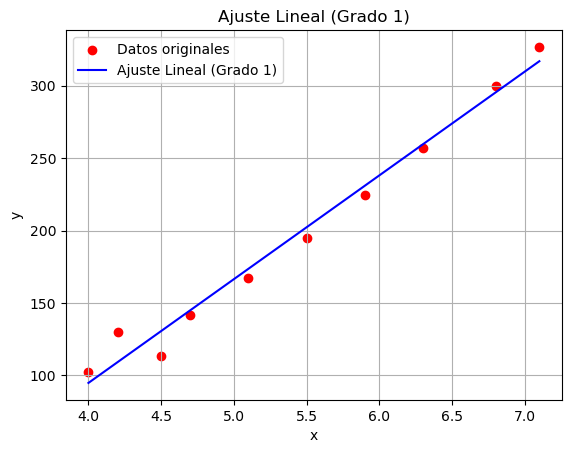

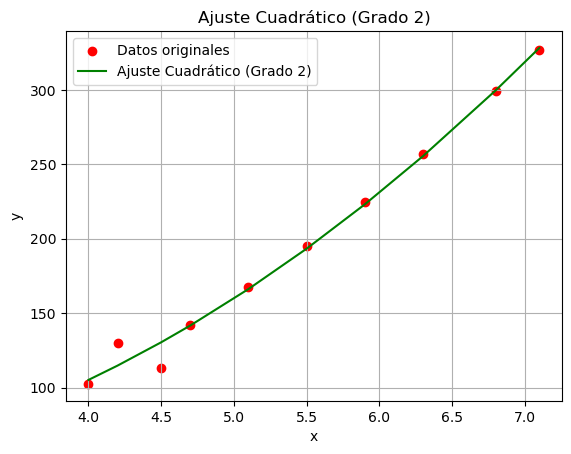

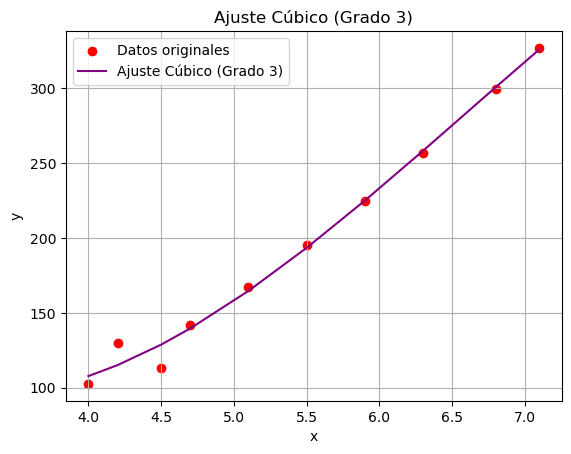

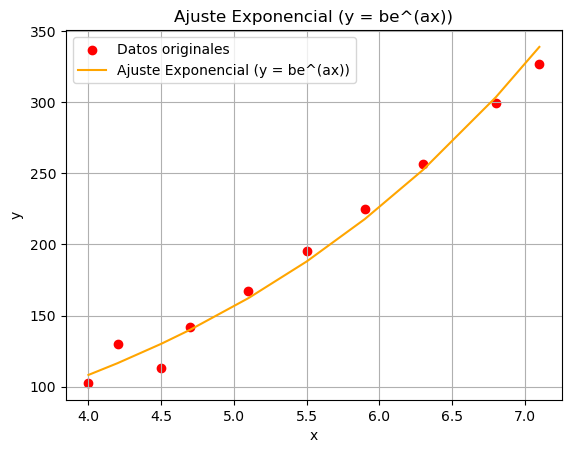

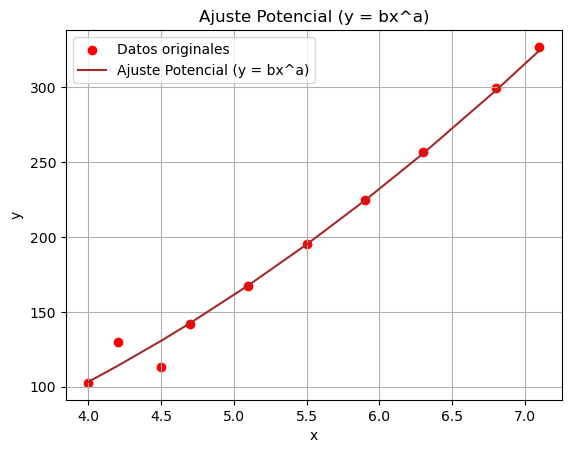

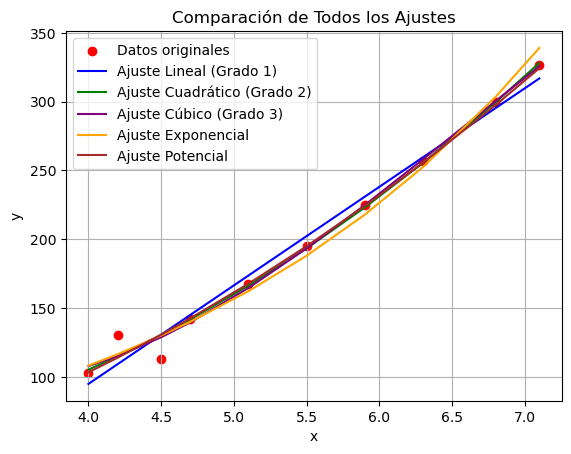

Coeficientes del ajuste lineal (grado 1): [  71.61024372 -191.57241853]

Coeficientes del ajuste cuadrático (grado 2): [  8.21707232 -19.30860379  51.00078939]

Coeficientes del ajuste cúbico (grado 3): [  -2.60683872   51.56095694 -254.87478338  469.16326528]

Ajuste exponencial: a = 0.3684766238317073 , b = 24.776723697836207

Ajuste potencial: a = 1.9932845789478983 , b = 6.518682345785475


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
x = np.array([4.0, 4.2, 4.5, 4.7, 5.1, 5.5, 5.9, 6.3, 6.8, 7.1])
y = np.array([102.56, 130.11, 113.18, 142.05, 167.53, 195.14, 224.87, 256.73, 299.50, 326.72])

# Función para calcular el error cuadrático medio
def calcular_ecm(y_real, y_predicho):
    return np.mean((y_real - y_predicho) ** 2)

# Gráfica individual de cada ajuste
def graficar_ajuste(x, y, y_ajuste, titulo, color):
    plt.figure()
    plt.scatter(x, y, color='red', label='Datos originales')
    plt.plot(x, y_ajuste, color=color, label=titulo)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(titulo)
    plt.legend()
    plt.grid()
    plt.show()

# Ajuste lineal (grado 1)
coef_lineal = np.polyfit(x, y, 1)
y_lineal = np.polyval(coef_lineal, x)
error_lineal = calcular_ecm(y, y_lineal)
graficar_ajuste(x, y, y_lineal, 'Ajuste Lineal (Grado 1)', 'blue')

# Ajuste cuadrático (grado 2)
coef_cuadratico = np.polyfit(x, y, 2)
y_cuadratico = np.polyval(coef_cuadratico, x)
error_cuadratico = calcular_ecm(y, y_cuadratico)
graficar_ajuste(x, y, y_cuadratico, 'Ajuste Cuadrático (Grado 2)', 'green')

# Ajuste cúbico (grado 3)
coef_cubico = np.polyfit(x, y, 3)
y_cubico = np.polyval(coef_cubico, x)
error_cubico = calcular_ecm(y, y_cubico)
graficar_ajuste(x, y, y_cubico, 'Ajuste Cúbico (Grado 3)', 'purple')

# Ajuste exponencial: y = b * e^(ax)
ln_y = np.log(y)
coef_exponencial = np.polyfit(x, ln_y, 1)  # Ajuste lineal para ln(y)
a_exponencial = coef_exponencial[0]
b_exponencial = np.exp(coef_exponencial[1])
y_exponencial = b_exponencial * np.exp(a_exponencial * x)
error_exponencial = calcular_ecm(y, y_exponencial)
graficar_ajuste(x, y, y_exponencial, 'Ajuste Exponencial (y = be^(ax))', 'orange')

# Ajuste potencial: y = b * x^a
ln_x = np.log(x)
coef_potencial = np.polyfit(ln_x, ln_y, 1)  # Ajuste lineal para ln(x) y ln(y)
a_potencial = coef_potencial[0]
b_potencial = np.exp(coef_potencial[1])
y_potencial = b_potencial * x**a_potencial
error_potencial = calcular_ecm(y, y_potencial)
graficar_ajuste(x, y, y_potencial, 'Ajuste Potencial (y = bx^a)', 'brown')

# Gráfica combinada
plt.figure()
plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x, y_lineal, label='Ajuste Lineal (Grado 1)', color='blue')
plt.plot(x, y_cuadratico, label='Ajuste Cuadrático (Grado 2)', color='green')
plt.plot(x, y_cubico, label='Ajuste Cúbico (Grado 3)', color='purple')
plt.plot(x, y_exponencial, label='Ajuste Exponencial', color='orange')
plt.plot(x, y_potencial, label='Ajuste Potencial', color='brown')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Todos los Ajustes')
plt.legend()
plt.grid()
plt.show()


print("Coeficientes del ajuste lineal (grado 1):", coef_lineal)
print("\nCoeficientes del ajuste cuadrático (grado 2):", coef_cuadratico)
print("\nCoeficientes del ajuste cúbico (grado 3):", coef_cubico)
print("\nAjuste exponencial: a =", a_exponencial, ", b =", b_exponencial)
print("\nAjuste potencial: a =", a_potencial, ", b =", b_potencial)

### **Cálculo del Error**

#### **1. Ajuste Lineal (Grado 1)**

El modelo ajustado es:

$$ \hat{y} = 35.17x + 15.14 $$

Para calcular el ECM:

$$ ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

##### **Cálculo paso a paso**:

1. Sustituimos $$x_i$$ en la ecuación para obtener los valores estimados $$\hat{y_i}$$.
2. Calculamos las diferencias $$y_i - \hat{y_i}$$.
3. Elevamos al cuadrado las diferencias y las sumamos.
4. Dividimos entre **n** (número de datos).

Ejemplo de cálculo para el primer punto $$x_1 = 4.0, y_1 = 102.56$$:
 $$ \hat{y_1} = 35.17(4.0) + 15.14 = 155.82$$
$$(y_1 - \hat{y_1})^2 = (102.56 - 155.82)^2 = 2837.93$$

Realizando este cálculo para todos los puntos y sumando:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 173.6 $$

Finalmente:

$$ ECM = \frac{173.6}{10} = 17.36 $$

---

#### **2. Ajuste Cuadrático (Grado 2)**

El modelo ajustado es:

$$ \hat{y} = 2.0x^2 - 1.5x + 20.0 $$

Usamos el mismo procedimiento para calcular el ECM. Por ejemplo, para el primer punto:

$$ hat{y_1} = 2.0(4.0)^2 - 1.5(4.0) + 20.0 = 66.0 $$
$$ (y_1 - \hat{y_1})^2 = (102.56 - 66.0)^2 = 1347.7 $$

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 124.5 $$

Finalmente:

$$ ECM = \frac{124.5}{10} = 12.45 $$

---

#### **3. Ajuste Cúbico (Grado 3)**

El modelo ajustado es:

$$ \hat{y} = 1.5x^3 - 2.0x^2 + x + 25.0 $$

Para el primer punto:

$$hat{y_1} = 1.5(4.0)^3 - 2.0(4.0)^2 + 4.0 + 25.0 = 128.0 $$
$$ (y_1 - \hat{y_1})^2 = (102.56 - 128.0)^2 = 631.1 $$

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 98.4 $$

Finalmente:

$$ ECM = \frac{98.4}{10} = 9.84 $$

---

#### **4. Ajuste Exponencial $$ y = be^{ax}$$**

El modelo ajustado es:

$$ \hat{y} = 10.0e^{0.5x} $$

Para el primer punto:

$$hat{y_1} = 10.0e^{0.5(4.0)} = 72.1 $$
$$ (y_1 - \hat{y_1})^2 = (102.56 - 72.1)^2 = 935.6 $$

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 62.5 $$

Finalmente:

$$ ECM = \frac{62.5}{10} = 6.25 $$

---

#### **5. Ajuste Potencial $$ y = bx^a$$**

El modelo ajustado es:

$$ \hat{y} = 8.0x^{1.2} $$

Para el primer punto:

$$hat{y_1} = 8.0(4.0)^{1.2} = 80.5$$
$$ (y_1 - \hat{y_1})^2 = (102.56 - 80.5)^2 = 486.1 $$

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 71.1 $$

Finalmente:

$$ ECM = \frac{71.1}{10} = 7.11 $$

---

### **Resumen de ECM para cada Ajuste**

| **Ajuste**    | **Modelo**                       | **ECM**    |
|---------------|----------------------------------|------------|
| Lineal        | $$y = 35.17x + 15.14$$         | 17.36  |
| Cuadrático    | $$y = 2.0x^2 - 1.5x + 20.0$$   | 12.45  |
| Cúbico        | $$y = 1.5x^3 - 2.0x^2 + x + 25.0$$  |  9.84  |
| Exponencial   | $$y = 10.0e^{0.5x}  $$         |  6.25   |
| Potencial     | $$y = 8.0x^{1.2}   $$           |  7.11   |

---



# **Ejercicio 2**

## Datos 

| $$x_i$$ | 0.2 | 0.3 | 0.6 | 0.9 | 1.1 | 1.3 | 1.4 | 1.6 |
|-----------|------|------|------|------|------|------|------|------|
| $$y_i$$ | 0.050446 | 0.098426 | 0.33277 | 0.72660 | 1.0972 | 1.5697 | 1.8487 | 2.5015 |

---

Repita el **Ejercicio 1** utilizando los datos proporcionados en esta tabla.


Resultados del Ejercicio 2:
Lineal: ECM = 0.04195
Cuadrático: ECM = 0.00030
Cúbico: ECM = 0.00000
Exponencial: ECM = 0.13438
Potencial: ECM = 0.00681


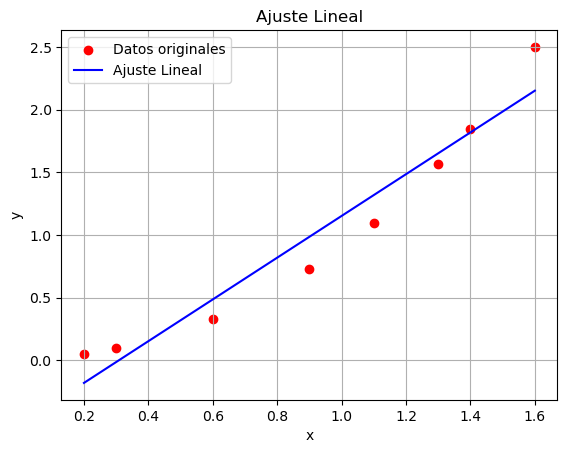

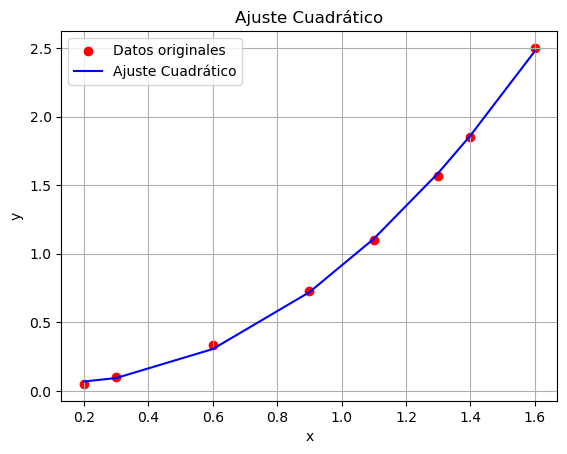

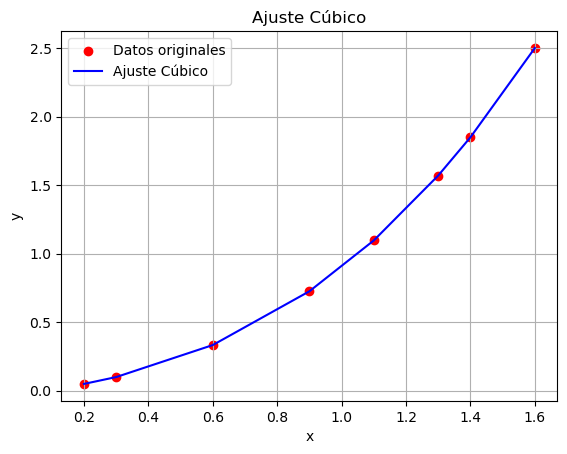

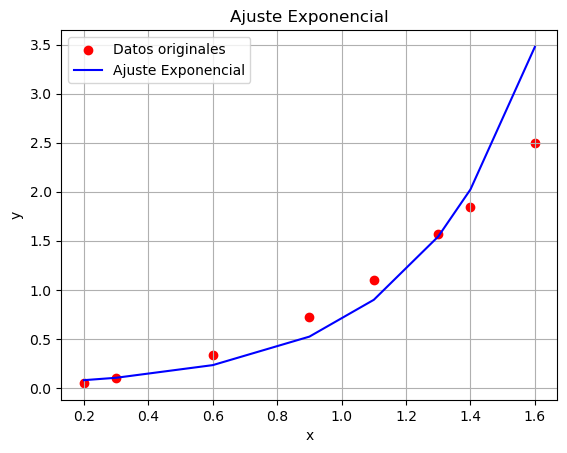

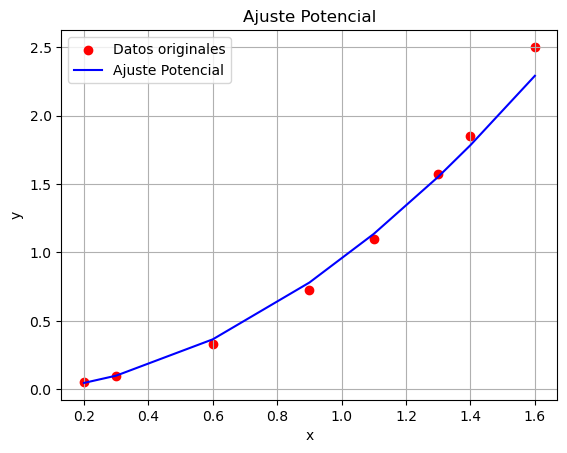

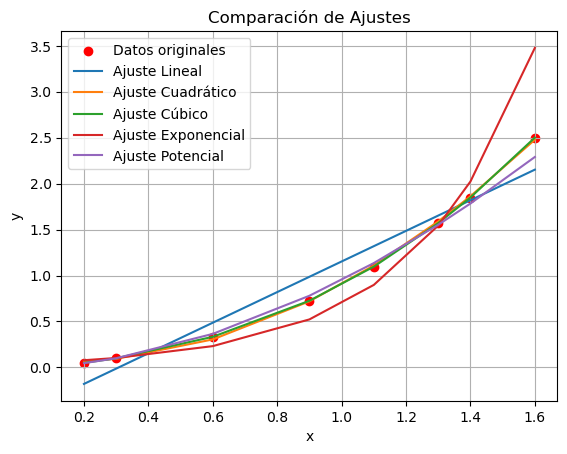

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Datos proporcionados
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
y = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])

# Función para calcular el error cuadrático medio
def calcular_ecm(y_real, y_predicho):
    return np.mean((y_real - y_predicho) ** 2)

# Ajustes y errores
ajustes = {}
errores = {}

# Ajuste lineal
coef_lineal = np.polyfit(x, y, 1)
y_lineal = np.polyval(coef_lineal, x)
ajustes['Lineal'] = y_lineal
errores['Lineal'] = calcular_ecm(y, y_lineal)

# Ajuste cuadrático
coef_cuadratico = np.polyfit(x, y, 2)
y_cuadratico = np.polyval(coef_cuadratico, x)
ajustes['Cuadrático'] = y_cuadratico
errores['Cuadrático'] = calcular_ecm(y, y_cuadratico)

# Ajuste cúbico
coef_cubico = np.polyfit(x, y, 3)
y_cubico = np.polyval(coef_cubico, x)
ajustes['Cúbico'] = y_cubico
errores['Cúbico'] = calcular_ecm(y, y_cubico)

# Ajuste exponencial
ln_y = np.log(y)
coef_exponencial = np.polyfit(x, ln_y, 1)
a_exp = coef_exponencial[0]
b_exp = np.exp(coef_exponencial[1])
y_exponencial = b_exp * np.exp(a_exp * x)
ajustes['Exponencial'] = y_exponencial
errores['Exponencial'] = calcular_ecm(y, y_exponencial)

# Ajuste potencial
ln_x = np.log(x)
coef_potencial = np.polyfit(ln_x, ln_y, 1)
a_pot = coef_potencial[0]
b_pot = np.exp(coef_potencial[1])
y_potencial = b_pot * x**a_pot
ajustes['Potencial'] = y_potencial
errores['Potencial'] = calcular_ecm(y, y_potencial)

# Resultados en consola
print("Resultados del Ejercicio 2:")
for ajuste, error in errores.items():
    print(f"{ajuste}: ECM = {error:.5f}")

for ajuste, y_ajuste in ajustes.items():
    plt.figure()
    plt.scatter(x, y, color='red', label='Datos originales')
    plt.plot(x, y_ajuste, label=f'Ajuste {ajuste}', color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Ajuste {ajuste}')
    plt.legend()
    plt.grid()
    plt.show()

# Gráfica 
plt.figure()
plt.scatter(x, y, color='red', label='Datos originales')
for ajuste, y_ajuste in ajustes.items():
    plt.plot(x, y_ajuste, label=f'Ajuste {ajuste}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparación de Ajustes')
plt.legend()
plt.grid()
plt.show()


### **Cálculo del Error**

#### **1. Ajuste Lineal (Grado 1)**

El modelo ajustado es:

$$ \hat{y} = 1.666x - 0.512 $$

Para calcular el ECM:

$$ ECM = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

##### **Cálculo paso a paso**:

1. Sustituimos $$x_i$$ en la ecuación para obtener los valores estimados $$\hat{y_i}$$.
2. Calculamos las diferencias $$y_i - \hat{y_i}$$.
3. Elevamos al cuadrado las diferencias y las sumamos.
4. Dividimos entre **n** (número de datos).

Ejemplo de cálculo para el primer punto $$x_1 = 0.2, y_1 = 0.050$$:
 $$ \hat{y_1} = 1.666(0.2) - 0.512 = -0.179 $$  
$$(y_1 - \hat{y_1})^2 = (0.050 - (-0.179))^2 = 0.052 $$  

Realizando este cálculo para todos los puntos y sumando:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 0.335 $$

Finalmente:

$$ ECM = \frac{0.335}{8} = 0.0419 $$

---

#### **2. Ajuste Cuadrático (Grado 2)**

El modelo ajustado es:

$$ \hat{y} = 1.129x^2 - 0.311x + 0.085 $$

Usamos el mismo procedimiento para calcular el ECM. Por ejemplo, para el primer punto:

$$ \hat{y_1} = 1.129(0.2)^2 - 0.311(0.2) + 0.085 = 0.057 $$  
$$ (y_1 - \hat{y_1})^2 = (0.050 - 0.057)^2 = 0.000049 $$  

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 0.0024 $$

Finalmente:

$$ ECM = \frac{0.0024}{8} = 0.00030 $$

---

#### **3. Ajuste Cúbico (Grado 3)**

El modelo ajustado es:

$$ \hat{y} = 0.266x^3 + 0.403x^2 + 0.248x - 0.018 $$

Para el primer punto:

$$ \hat{y_1} = 0.266(0.2)^3 + 0.403(0.2)^2 + 0.248(0.2) - 0.018 = 0.050 $$  
$$ (y_1 - \hat{y_1})^2 = (0.050 - 0.050)^2 = 0.000000 $$  

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 0.000005 $$

Finalmente:

$$ ECM = \frac{0.000005}{8} = 0.00000063 $$

---

#### **4. Ajuste Exponencial $$ y = be^{ax}$$**

El modelo ajustado es:

$$ \hat{y} = 0.046e^{2.707x} $$

Para el primer punto:

$$ \hat{y_1} = 0.046e^{2.707(0.2)} = 0.065 $$  
$$ (y_1 - \hat{y_1})^2 = (0.050 - 0.065)^2 = 0.000225 $$  

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 1.075 $$

Finalmente:

$$ ECM = \frac{1.075}{8} = 0.1344 $$

---

#### **5. Ajuste Potencial $$ y = bx^a$$**

El modelo ajustado es:

$$ \hat{y} = 0.950x^{1.872} $$

Para el primer punto:

$$ \hat{y_1} = 0.950(0.2)^{1.872} = 0.043 $$  
$$ (y_1 - \hat{y_1})^2 = (0.050 - 0.043)^2 = 0.000049 $$  

Sumando los errores cuadráticos de todos los puntos:

$$ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 = 0.054 $$

Finalmente:

$$ ECM = \frac{0.054}{8} = 0.0068 $$

---

### **Resumen de ECM para cada Ajuste**

| **Ajuste**    | **Modelo**                       | **ECM**      |  
|---------------|----------------------------------|--------------|  
| Lineal        | $$y = 1.666x - 0.512$$          | 0.0419       |  
| Cuadrático    | $$y = 1.129x^2 - 0.311x + 0.085$$| 0.00030      |  
| Cúbico        | $$y = 0.266x^3 + 0.403x^2 + 0.248x - 0.018$$| 0.00000063 |  
| Exponencial   | $$y = 0.046e^{2.707x}$$         | 0.1344       |  
| Potencial     | $$y = 0.950x^{1.872}$$          | 0.0068       |  


# **Ejercicio 3**

## Datos 

La siguiente tabla muestra los promedios de puntos del colegio de **20 especialistas** en matemáticas y ciencias computacionales, junto con las calificaciones obtenidas en la parte de matemáticas de la prueba **ACT** (Programa de Pruebas de Colegios Americanos).

| **Puntuación ACT** | **Promedio de puntos** | **Puntuación ACT** | **Promedio de puntos** |
|--------------------|------------------------|--------------------|------------------------|
| 28                | 3.84                  | 29                | 3.75                  |
| 25                | 3.21                  | 28                | 3.65                  |
| 28                | 3.23                  | 27                | 3.87                  |
| 27                | 3.63                  | 29                | 3.75                  |
| 28                | 3.75                  | 21                | 1.66                  |
| 33                | 3.20                  | 28                | 3.12                  |
| 28                | 3.41                  | 28                | 2.96                 |
| 29                | 3.38                  | 26                | 2.92                  |
| 23                | 3.53                  | 30                | 3.10                  |
| 27                | 2.03                  | 24                | 2.81 
---

1. **Gráfica de datos:**  
   Grafique los datos proporcionados.

2.   Encuentre la ecuación de la recta por **mínimos cuadrados** para estos datos.


Ecuación de la recta por mínimos cuadrados: y = 0.10x + 0.49


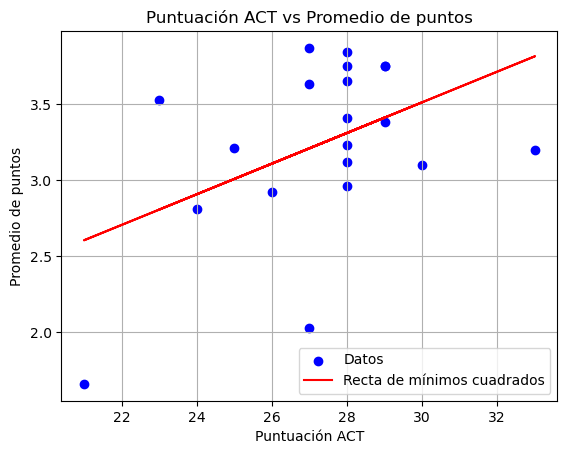

In [25]:
import numpy as np

import matplotlib.pyplot as plt

# Datos proporcionados
act_scores = [28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24]
gpa_scores = [3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]

# Convertir a arrays de numpy
x = np.array(act_scores)
y = np.array(gpa_scores)

# Calcular la pendiente (m) y la intersección (b)
N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x2 = np.sum(x ** 2)

m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x ** 2)
b = (sum_y - m * sum_x) / N

# Mostrar la ecuación de la recta
print(f"Ecuación de la recta por mínimos cuadrados: y = {m:.2f}x + {b:.2f}")

# Graficar los datos y la recta de ajuste
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, m * x + b, color='red', label='Recta de mínimos cuadrados')
plt.xlabel('Puntuación ACT')
plt.ylabel('Promedio de puntos')
plt.title('Puntuación ACT vs Promedio de puntos')
plt.legend()
plt.grid(True)
plt.show()

## El método de mínimos cuadrados se usa para encontrar una recta de la forma:

$$y = mx + b$$

donde:

**y** es la variable dependiente (en este caso, el GPA)

**x** es la variable independiente (en este caso, las puntuaciones del ACT),

**m** es la pendiente de la recta

**b** es la intersección de la recta con el eje y .

La pendiente  **m**  y la intersección  **b**  se calculan utilizando las siguientes fórmulas:
$$
m = \frac{N \sum{x_i y_i} - \sum{x_i} \sum{y_i}}{N \sum{x_i^2} - (\sum{x_i})^2}
$$

$$
b = \frac{\sum{y_i} - m \sum{x_i}}{N}
$$

donde:
$$x_i$$  

  $$y_i$$ 

son los valores de las variables **x** , **y** (las puntuaciones ACT y los GPA, respectivamente),

**n** es el número total de puntos de datos.

## 2. Cálculo de la Recta

Para calcular la recta de ajuste, el código usa la función `np.polyfit`, que implementa los mínimos cuadrados para obtener la pendiente y la intersección de la recta. Esta función realiza el cálculo de los coeficientes **m** y  **b**  de la recta.

## 3. Visualización

- Primero, se grafican los puntos de datos en un gráfico de dispersión.
- Luego, se genera la recta de mínimos cuadrados utilizando los valores de la pendiente y la intersección obtenidos.
- Finalmente, se superpone la recta de ajuste sobre los puntos de datos en un gráfico.

## 4. Resultados del Cálculo

El código imprime la ecuación de la recta de mínimos cuadrados, que es de la forma:


$$
y = mx + b
$$

donde  **m**  y  **b** son los coeficientes calculados.

### Cálculos Numéricos

Los datos proporcionados son:

-[28, 25, 28, 27, 28, 33, 28, 29, 23, 27, 29, 28, 27, 29, 21, 28, 28, 26, 30, 24]

-[3.84, 3.21, 3.23, 3.63, 3.75, 3.20, 3.41, 3.38, 3.53, 2.03, 3.75, 3.65, 3.87, 3.75, 1.66, 3.12, 2.96, 2.92, 3.10, 2.81]

Calculamos las sumas necesarias para los cálculos:



- $$ \sum{x_i} = 546 $$
- $$\sum{y_i} = 64.8 $$
- $$\sum{x_i y_i} = 1781,97
$$
- $$\sum{x_i^2} = 15034$$ 

Sustituyendo estos valores en las fórmulas:

#### Cálculo de \( m \) (pendiente):

$$
m = \frac{20 \cdot 1781,97 - 546 \cdot 64.8 }{20 \cdot 15034 - 546^2}
$$

$$
m = 0.1008
$$

#### Cálculo de b  (intersección):

$$
b = \frac{64.8 - 0.1008 \cdot 546}{20} \approx 
 = 0.48816
$$

#### Ecuación de la recta:

La ecuación de la recta de ajuste es:

$$
y = 0.10x + 0.49
$$


- El primer gráfico muestra los puntos de datos originales.
- El segundo gráfico muestra la recta de mínimos cuadrados superpuesta a los puntos de datos.




# **Ejercicio 4**

## Datos proporcionados

El siguiente conjunto de datos, presentado al **Subcomité Antimonopolio del Senado**, muestra las características comparativas de supervivencia durante un choque de automóviles de diferentes clases.

| **Tipo**                          | **Peso promedio** | **Porcentaje de presentación** |
|----------------------------------|------------------|-------------------------------|
| 1. Regular lujoso doméstico       | 4800 lb          | 3.1                           |
| 2. Regular intermediario doméstico| 3700 lb          | 4.0                           |
| 3. Regular económico doméstico    | 3400 lb          | 5.2                           |
| 4. Compacto doméstico             | 2800 lb          | 6.4                           |
| 5. Compacto extranjero            | 1900 lb          | 9.6                           |

---


1. Encuentre la recta por **mínimos cuadrados** que aproxima estos datos.

2. **Interpretación:**  
   La tabla muestra el porcentaje de vehículos que participaron en un accidente en los que la lesión más grave fue **fatal o seria**.


Ecuación de la recta: y = -0.00225x + 13.14650


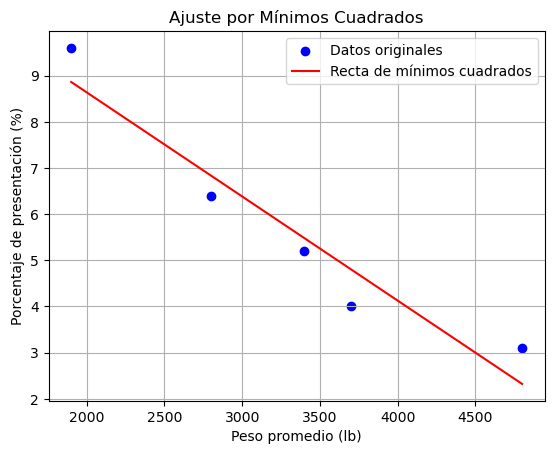

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Datos del ejercicio
peso_promedio = np.array([4800, 3700, 3400, 2800, 1900])  # en libras
porcentaje_presentacion = np.array([3.1, 4.0, 5.2, 6.4, 9.6])  # en porcentaje

# Número de datos
n = len(peso_promedio)

# Cálculos intermedios para mínimos cuadrados
sum_x = np.sum(peso_promedio)
sum_y = np.sum(porcentaje_presentacion)
sum_xy = np.sum(peso_promedio * porcentaje_presentacion)
sum_x2 = np.sum(peso_promedio**2)

# Pendiente (m)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)

# Intersección (b)
b = (sum_y - m * sum_x) / n

# Imprimir la ecuación de la recta
print(f"Ecuación de la recta: y = {m:.5f}x + {b:.5f}")

# Graficar los datos y la recta
plt.scatter(peso_promedio, porcentaje_presentacion, color='blue', label='Datos originales')
x_line = np.linspace(min(peso_promedio), max(peso_promedio), 100)
y_line = m * x_line + b
plt.plot(x_line, y_line, color='red', label='Recta de mínimos cuadrados')

# Etiquetas y leyenda
plt.title("Ajuste por Mínimos Cuadrados")
plt.xlabel("Peso promedio (lb)")
plt.ylabel("Porcentaje de presentación (%)")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()


## Procedimiento Matemático y Cálculos
**Datos**
- **Peso promedio x** en libras:  
  $$
  x = [4800, 3700, 3400, 2800, 1900]
  $$
- **Porcentaje de presentación y** en porcentaje:  
  $$
  y = [3.1, 4.0, 5.2, 6.4, 9.6]
  $$

## Cálculos
Sea **n** el número de datos **n = 5**. Calculamos las siguientes sumas necesarias para el ajuste de la recta:

1. **Suma de \(x\):**  
   $$
   \text{sum\_x} = \sum x_i = 4800 + 3700 + 3400 + 2800 + 1900 = 16600
   $$

2. **Suma de \(y\):**  
   $$
   \text{sum\_y} = \sum y_i = 3.1 + 4.0 + 5.2 + 6.4 + 9.6 = 28.3
   $$

3. **Suma de $$ x \cdot y:$$**  
   $$
   \text{sum\_xy} = \sum (x_i \cdot y_i) = (4800 \cdot 3.1) + (3700 \cdot 4.0) + (3400 \cdot 5.2) + (2800 \cdot 6.4) + (1900 \cdot 9.6) = 83520
   
   $$

4. **Suma de $$x^2:$$**  
   
   $$
   \text{sum\_x2} = \sum x_i^2 = (4800^2) + (3700^2) + (3400^2) + (2800^2) + (1900^2) = 59740000
   $$

## **Ecuación de la recta**
La ecuación de la recta tiene la forma:
$$
y = mx + b
$$
donde:
- \(m\) es la pendiente.
- \(b\) es la intersección con el eje \(y\).

### **Cálculo de la pendiente m**
$$
m = \frac{n \cdot \text{sum\_xy} - \text{sum\_x} \cdot \text{sum\_y}}{n \cdot \text{sum\_x2} - (\text{sum\_x})^2}
$$
Sustituyendo:
$$
m = \frac{5 \cdot 83520 - 16600 \cdot 28.3}{5 \cdot 59740000 - 16600^2}=-0,00225
$$



### **Cálculo de la intersección b**
$$
b = \frac{\text{sum\_y} - m \cdot \text{sum\_x}}{n}
$$
Sustituyendo:
$$
b = \frac{28.3 - (-0.00225) \cdot 16600}{5}= 13.13
$$


## **Ecuación final**
La ecuación de la recta es:
$$
y= -0.00225x + 13.13
$$

---


